#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Know your Data

#### Dataset Loading 

In [3]:
df = pd.read_csv(r'data\Hotel Bookings.csv')

#### Dataset View

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


##### Dataset Rows and Columns

In [5]:
# Return shape of dataset
df.shape

(119390, 32)

Rows count = 119390 

Column count = 32

In [6]:
df.index

RangeIndex(start=0, stop=119390, step=1)

Coloumns names

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [9]:
duplicate_values = df.duplicated().value_counts()
duplicate_values

False    87396
True     31994
Name: count, dtype: int64

C:\Users\Digvi\AppData\Local\Temp\ipykernel_436\1941427825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df.duplicated(), palette = bright_color[2 : 4] )


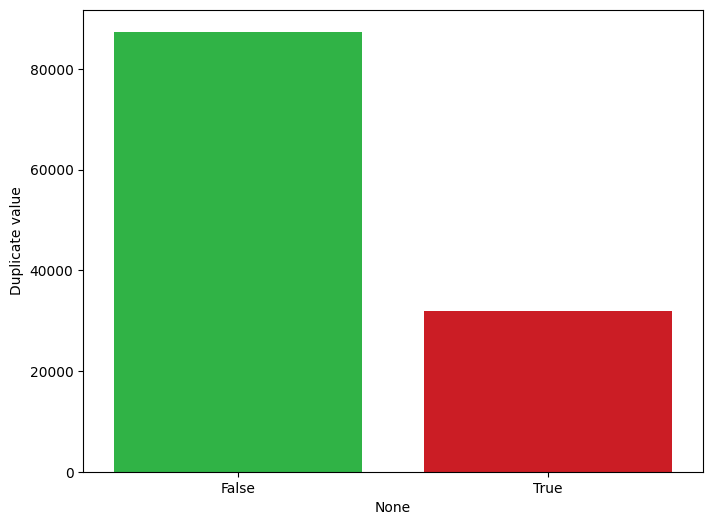

In [10]:
# Visualizing duplicate values

bright_color = sns.color_palette('bright')
plt.figure(figsize= (8, 6))
sns.countplot(x = df.duplicated(), palette = bright_color[2 : 4] )

plt.ylabel('Duplicate value')
plt.show()

#### Removing Duplicate values

In [11]:
# Drop duplicate values from dataset
df.drop_duplicates(inplace = True)

In [12]:
df.shape
df.shape[0]
# as you can see before droping duplicates, we were having 119390 rows
# after droping duplicate rows, there are 87396 unique rows

87396

#### Missing values/ Null values

In [25]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending= False).head()

company               82137
agent                 12193
country                 452
children                  4
arrival_date_month        0
dtype: int64

In [ ]:
df.fillna(np.nan, inplace = True)
df
# We have replaced all null values as NaN

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [30]:
# Visualizing the missing value
missing_values = df.isna().sum().sort_values(ascending= False)[:5]
missing_values

company               82137
agent                 12193
country                 452
children                  4
arrival_date_month        0
dtype: int64

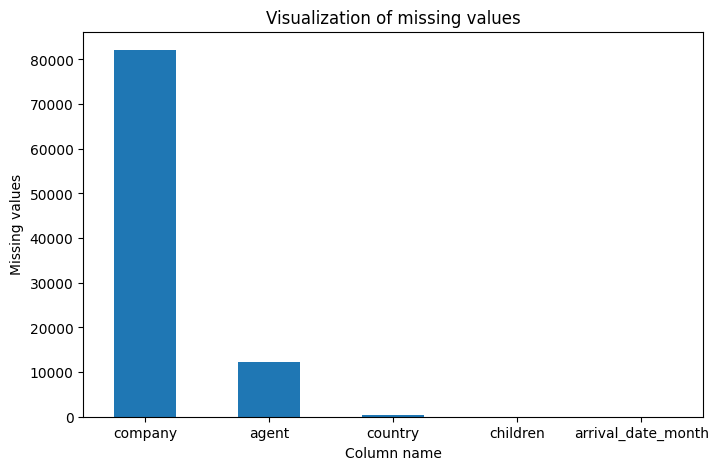

In [54]:
plt.figure( figsize= (8, 5))
missing_values.plot(kind= 'bar')

plt.title('Visualization of missing values')
plt.xticks(rotation = 0)
plt.xlabel('Column name')
plt.ylabel('Missing values')
plt.show()

##### Reseting Index

In [ ]:
df.reset_index(inplace= True, drop= True)
df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
87391,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
87392,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
87393,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
87394,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
87395,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


#### What did you know about your dataset?
1. The given dataset is of Hotel Booking and we have to analyse and explore this dataset to discover important factors which affects the Hotel Booking.  
    This dataset has 119390 rows and 32 coulumns.
2. The duplicate value count is 31994 rows.
3. There are 4 columns in dataset which is having missing valuse and those columns are company, agent, country and children.
4. There are separate columns called adults, children and babies that show the total number of people who are coming to visit, 
    so instead of different columns will add these three in one called total_num_people

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            

### 2. Understanding your variables

In [73]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')
df.describe( include= 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396,86944,87396,87396,87396.000000,87396.000000,87396.000000,87396,87396,87396.000000,87396,75203.000000,5259.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67978,27453,51618,69141,NaN,NaN,NaN,56552,46313,NaN,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,NaN,NaN,NaN,NaN,0.039075,0.030413,0.183990,NaN,NaN,0.271603,NaN,94.138306,183.081384,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,NaN,NaN,NaN,NaN,0.193775,0.369145,1.731894,NaN,NaN,0.727245,NaN,113.188172,130.557608,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,47.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,169.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,240.000000,263.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


#### Vairable Description
* hotel - **Type of hotel(Resort or City).**
* is_canceld - **If there was booking cancel(1) or not(0).**
* lead time - **The number of days between time books their room to arrive hotel.**
* arrival_date_year - **Year of arrival date.**
* arrival_date_month - **Month of arrival date**.
* arrival_date_week_number - **Week no. of year for arrival date.**
* stays_in_weekend_nights - **No. of weekend nights(Saturday or sunday) spend by guest at hotel.**
* stays_in_week_nights - **No. of weeknight( Mon to Fri) spend by guest at hotel**.
* adults - **No. of adults among guest.**
* children - **No. of children among guest.**
* babies - **No. of babies among guest.**
* meal - **Type of meal booked by guest.**
* country - **Country of guest.**
* market_segment - **Grouping into categories based on their booking patterns and travel habits.**
* distribution_channel - **Name of booking distribution channel.**
* is_repeated_guest - **If the booking was from repeated by guest(1) or not(0).**
* previous_cancelletions - **No. of previous booking that were cancelled by the customer prior to the customer booking.**
* previous_booking_not_canceled - **No. of previous booking that were not cancelled by the customer prior to the customer booking.**
* reserved_room_type - **Code of room type reserved.**
* assigned_room_type - **Code of room type reserved.**
* booking_changes - **No. of changes made to the booking.**
* deposit_type - **Type of the deposit made by the guest.**
* agent - **Id of the agent who made the booking.**
* company - **Id of the company that made the booking.**
* days_in_waiting_list - **No. of days the booking on the waiting list.**
* customer_type - **Type of customer, assuming one of four categories.**
* adr - **(Average Daily Rate) dividing the sum of lodgging transaction by the total number of staying night.**
* required_car_parking_spaces - **No. of car parking spaces required by the customer.**
* total_of_special_request - **No. of special request made by the customer.**
* reservation_request - **Reservation status**
* reservation_request_date - **Date of last reservation status updated.**

#### Check Unique values of each variable

In [ ]:
# Check Unique Values for each variable.

uni = df.apply(lambda x : x.unique())
uni

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

### 3. Data Wrangling
##### We already did some data cleaning before, lets go for data wrangling

In [83]:
# MAking copy of data set
df1 = df.copy()

In [86]:
# Adding total staying days in hotel in one column
df1['total_stay']= df1['stays_in_weekend_nights']+ df1['stays_in_week_nights']

# Adding total people num as a column
df1['total_num_people'] =  df1['adults']+df1['children'] +df1['babies']

df1.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_num_people
50247,City Hotel,1,40,2017,June,24,11,2,4,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,143.33,0,1,Canceled,2017-05-04,6,2.0
61466,City Hotel,0,201,2016,May,19,1,2,1,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Contract,106.20,0,1,Check-Out,2016-05-04,3,2.0
65619,City Hotel,0,186,2016,July,30,18,1,2,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,105.30,1,1,Check-Out,2016-07-21,3,2.0
10926,Resort Hotel,0,0,2017,February,8,22,0,3,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,D,1,No Deposit,NaN,12.0,0,Transient,38.50,1,0,Check-Out,2017-02-25,3,1.0
49135,City Hotel,1,42,2017,May,19,8,1,2,1,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8.0,NaN,0,Transient,139.00,0,1,Canceled,2017-04-04,3,1.0


In [102]:
# There are some rows of adult, children, babies equal to zero, means there were no bookings made
df1[df1['total_num_people'] == 0]

# We can remove such columns

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_num_people
2088,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,3,0.0
2224,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0,0.0
2804,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,3,0.0
3091,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,5,0.0
3099,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83728,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30,3,0.0
83780,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01,1,0.0
84714,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17,2,0.0
84970,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,7,0.0


In [109]:
df1.drop(df1[df1['total_num_people'] == 0].index, inplace = True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
87392,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
87393,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
87394,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### What all manipulations have you done and insights you found?

1. In dataset, there were 31994 duplicate values. So those values were removed.

2. There were 4 columns which have missing values and the columns were 'company','agent','country','children'. The values from these columns are replaced by NaN.

3. Three columns 'adults','children','babies' had valuen zero which means no booking has done here, so these columns were removed

4. In dataframe added two columns tatal_stay and total_num_people.

### 4. Data Visualization, Storytelling & Expirementing with charts : 

##### Understanding the relationships between variable

#### Chart - 1
*Question no. 1: Which Type of hotel have more number of bookings **[ City hotels or Resort hotels ]** .* 

In [ ]:
# code ot count booking value
hotel_value_counts = df['hotel'].value_counts()
hotel_value_counts

hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64

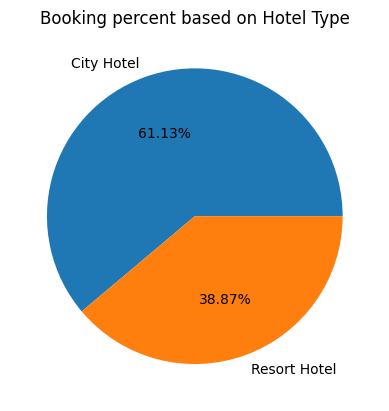

In [134]:
# Pie Chart for most Preffered hotel
hotel_value_counts.plot(kind = 'pie', autopct = "%1.2f%%")

plt.title('Booking percent based on Hotel Type' , size = 12)
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?
>I used the pie chart To check and understand the hotel type is resort or city in simple way of visualizing.

##### 2. What is/are the insight(s) found from the chart?
>Based on the above observations, I found that 61.07% preferred city hotel and 38.93% preferred to book a resort hotel.<br>
>Which means Resort hotels have less booking

##### 3. Will the gained insights help creating a positive business impact? <br> Are there any insights that lead to negative growth? Justify with specific reason.
>City hotel can find more services to attract more guests to increase more revenue. <br>
>**Resort Hotel can find a solution to attract customers and also find the facilities provided by the city Hotel to attract customers.**<br>
>So Yes, gained insights help creating a positive business impact

#### Chart - 2
*Question no. 2 Which type of Hotel have more revenue or ADR[ City hotels or Resort Hotels ]*

In [ ]:
# grouping by hotel adr
avg_adr = df1.groupby('hotel')['adr'].mean()
avg_adr

hotel
City Hotel      111.271969
Resort Hotel     99.059517
Name: adr, dtype: float64

(array([0, 1]), [Text(0, 0, 'City Hotel'), Text(1, 0, 'Resort Hotel')])

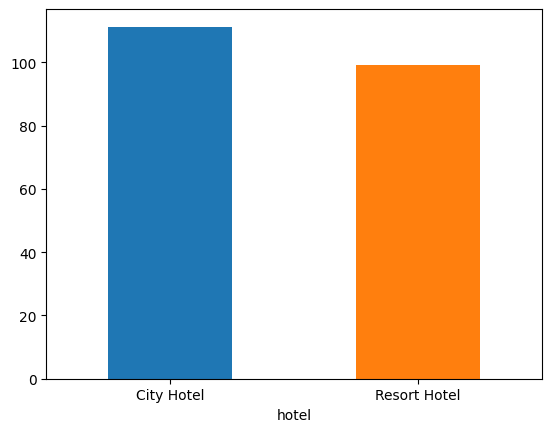

In [ ]:
# graph plotting
avg_adr.plot(kind = 'bar', color = sns.color_palette('tab10'))

plt.title('Avg ADR [average daily rate] of each hotel type')
plt.ylabel('ADR')
plt.xticks(rotation = 0)


##### 1. Why did you pick the specific chart?
>I choose bar plot because it gives simple pictorial diagram and it also easy to understand for Avg ADR Of each hotel Type.

##### 2. What is/are the insight(s) found from the chart?
>From above insights i found that city hotels have more ADR that means City hotels Generate more Revenue than Resort Hotels

##### 3. Will the gained insights help creating a positive business impact? <br>Are there any insights that lead to negative growth? Justify with specific reason. 
>City hotel has **ADR 110 means more revenue and resort hotel has almost 99 ADR means less revenue than city hotel.** City hotel has high adr this makes positive impact. <br>
>Resort hotel has less adr as compared to city hotel this makes negative impact. Resort hotel should have increase there facilities which increase revenue.

#### Chart - 3
*Question no. 3: What is the pecentage of Booking cancellation for both type*

In [ ]:
# value count of is_canceled
canceled = df1['is_canceled'].value_counts()        # 0 = not cancel, 1 = cancel
canceled

is_canceled
0    63221
1    24009
Name: count, dtype: int64

Text(0, 0.5, '')

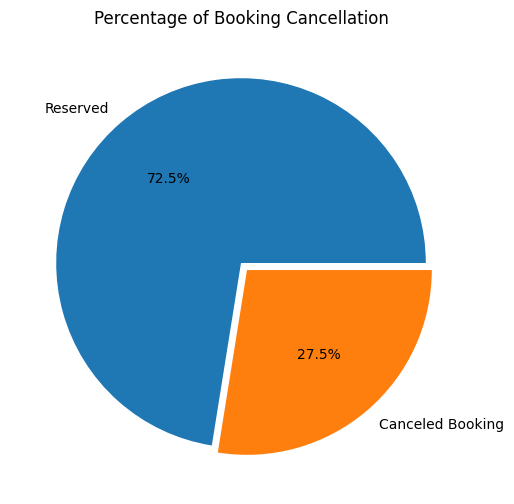

In [157]:
# graph plotting
custom_labels = ['Reserved', 'Canceled Booking']
plt.figure(figsize= (6,6))
canceled.plot(kind = 'pie', autopct = "%1.1f%%" , labels = custom_labels, explode =[0, 0.05] )

plt.title('Percentage of Booking Cancellation')
plt.ylabel('')

##### 1. Why did you pick the specific chart?
>I choose pie chart because it gives simple visualization of data.

##### 2. What is/are the insight(s) found from the chart?
>Here, we found that overall more than 27% of booking got cancelled, 0 = not cancelled 1 = cancelled

##### 3. Will the gained insights help creating a positive business impact? <br> Are there any insights that lead to negative growth? Justify with specific reason.
>Here we can see that overall 27% of the bookings were cancelled, from a business perspective it falls under negative impact.<br>
>To overcome this, we need to find the reasons behind it and take appropriate action

In [111]:
df1.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_num_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0


In [158]:
df1.to_csv('update02.csv')